# House Prices

## Imports and Dataset start

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
df_train= pd.read_csv('train.csv')

### Sorted Correlation

In [13]:
df_corr = df_train.corr()
ordenado = df_corr.sum().sort_values(ascending=True).index.values
df_corr_sorted = df_corr[ordenado].corr()

In [14]:
df_corr_sorted

,EnclosedPorch,OverallCond,YrSold,MSSubClass,KitchenAbvGr,BsmtHalfBath,LowQualFinSF,Id,BsmtFinSF2,MiscVal,...,Fireplaces,TotalBsmtSF,1stFlrSF,FullBath,GarageArea,GarageCars,TotRmsAbvGrd,OverallQual,SalePrice,GrLivArea
EnclosedPorch,1.000000,0.331403,0.011600,0.010270,0.221722,0.052459,0.244819,0.046065,0.119053,0.102403,...,-0.229757,-0.392140,-0.322687,-0.414384,-0.489634,-0.515624,-0.117576,-0.490858,-0.477651,-0.214385
OverallCond,0.331403,1.000000,0.109607,-0.039221,-0.042334,0.270654,0.143234,0.041212,0.149662,0.176015,...,-0.254107,-0.486539,-0.446812,-0.542128,-0.540258,-0.562614,-0.293451,-0.491494,-0.471958,-0.373882
YrSold,0.011600,0.109607,1.000000,-0.033798,0.024277,-0.095823,-0.075002,-0.016694,0.067123,0.006010,...,-0.192124,-0.149323,-0.155867,-0.210165,-0.182267,-0.191740,-0.235300,-0.204376,-0.207811,-0.258938
MSSubClass,0.010270,-0.039221,-0.033798,1.000000,0.405424,-0.047401,0.079211,0.019591,-0.199492,-0.003869,...,-0.286525,-0.533122,-0.545717,0.040987,-0.285088,-0.204383,-0.013591,-0.154287,-0.263538,-0.071994
KitchenAbvGr,0.221722,-0.042334,0.024277,0.405424,1.000000,-0.074111,0.131017,0.028482,-0.096793,0.113448,...,-0.319954,-0.319599,-0.186110,-0.009264,-0.324136,-0.302797,0.203072,-0.388281,-0.362060,-0.011376
BsmtHalfBath,0.052459,0.270654,-0.095823,-0.047401,-0.074111,1.000000,-0.012050,-0.057806,0.135566,-0.012119,...,-0.102576,-0.183081,-0.169894,-0.276374,-0.232394,-0.235072,-0.209289,-0.255951,-0.234746,-0.232302
LowQualFinSF,0.244819,0.143234,-0.075002,0.079211,0.131017,-0.012050,1.000000,-0.083284,0.012513,0.001235,...,-0.165618,-0.251014,-0.199924,-0.146229,-0.307044,-0.320219,0.084435,-0.257050,-0.252426,0.001095
Id,0.046065,0.041212,-0.016694,0.019591,0.028482,-0.057806,-0.083284,1.000000,-0.030037,-0.028278,...,-0.174186,-0.163874,-0.143407,-0.134660,-0.132115,-0.130220,-0.107610,-0.183697,-0.192466,-0.159049
BsmtFinSF2,0.119053,0.149662,0.067123,-0.199492,-0.096793,0.135566,0.012513,-0.030037,1.000000,0.004346,...,-0.036709,-0.029171,-0.014667,-0.354730,-0.205285,-0.244239,-0.270996,-0.286238,-0.215899,-0.257416
MiscVal,0.102403,0.176015,0.006010,-0.003869,0.113448,-0.012119,0.001235,-0.028278,0.004346,1.000000,...,-0.180360,-0.226456,-0.215818,-0.224798,-0.253449,-0.262289,-0.151765,-0.265674,-0.262012,-0.220140


### Matriz de Correlação

In [15]:
#HeatMap is cutting off the first and the last box.
def fixheatmap():
    b, t = plt.ylim() # discover the values for bottom and top
    b += 0.5 # Add 0.5 to the bottom
    t -= 0.5 # Subtract 0.5 from the top
    return plt.ylim(b, t) # update the ylim(bottom, top) values

(38.0, 0.0)

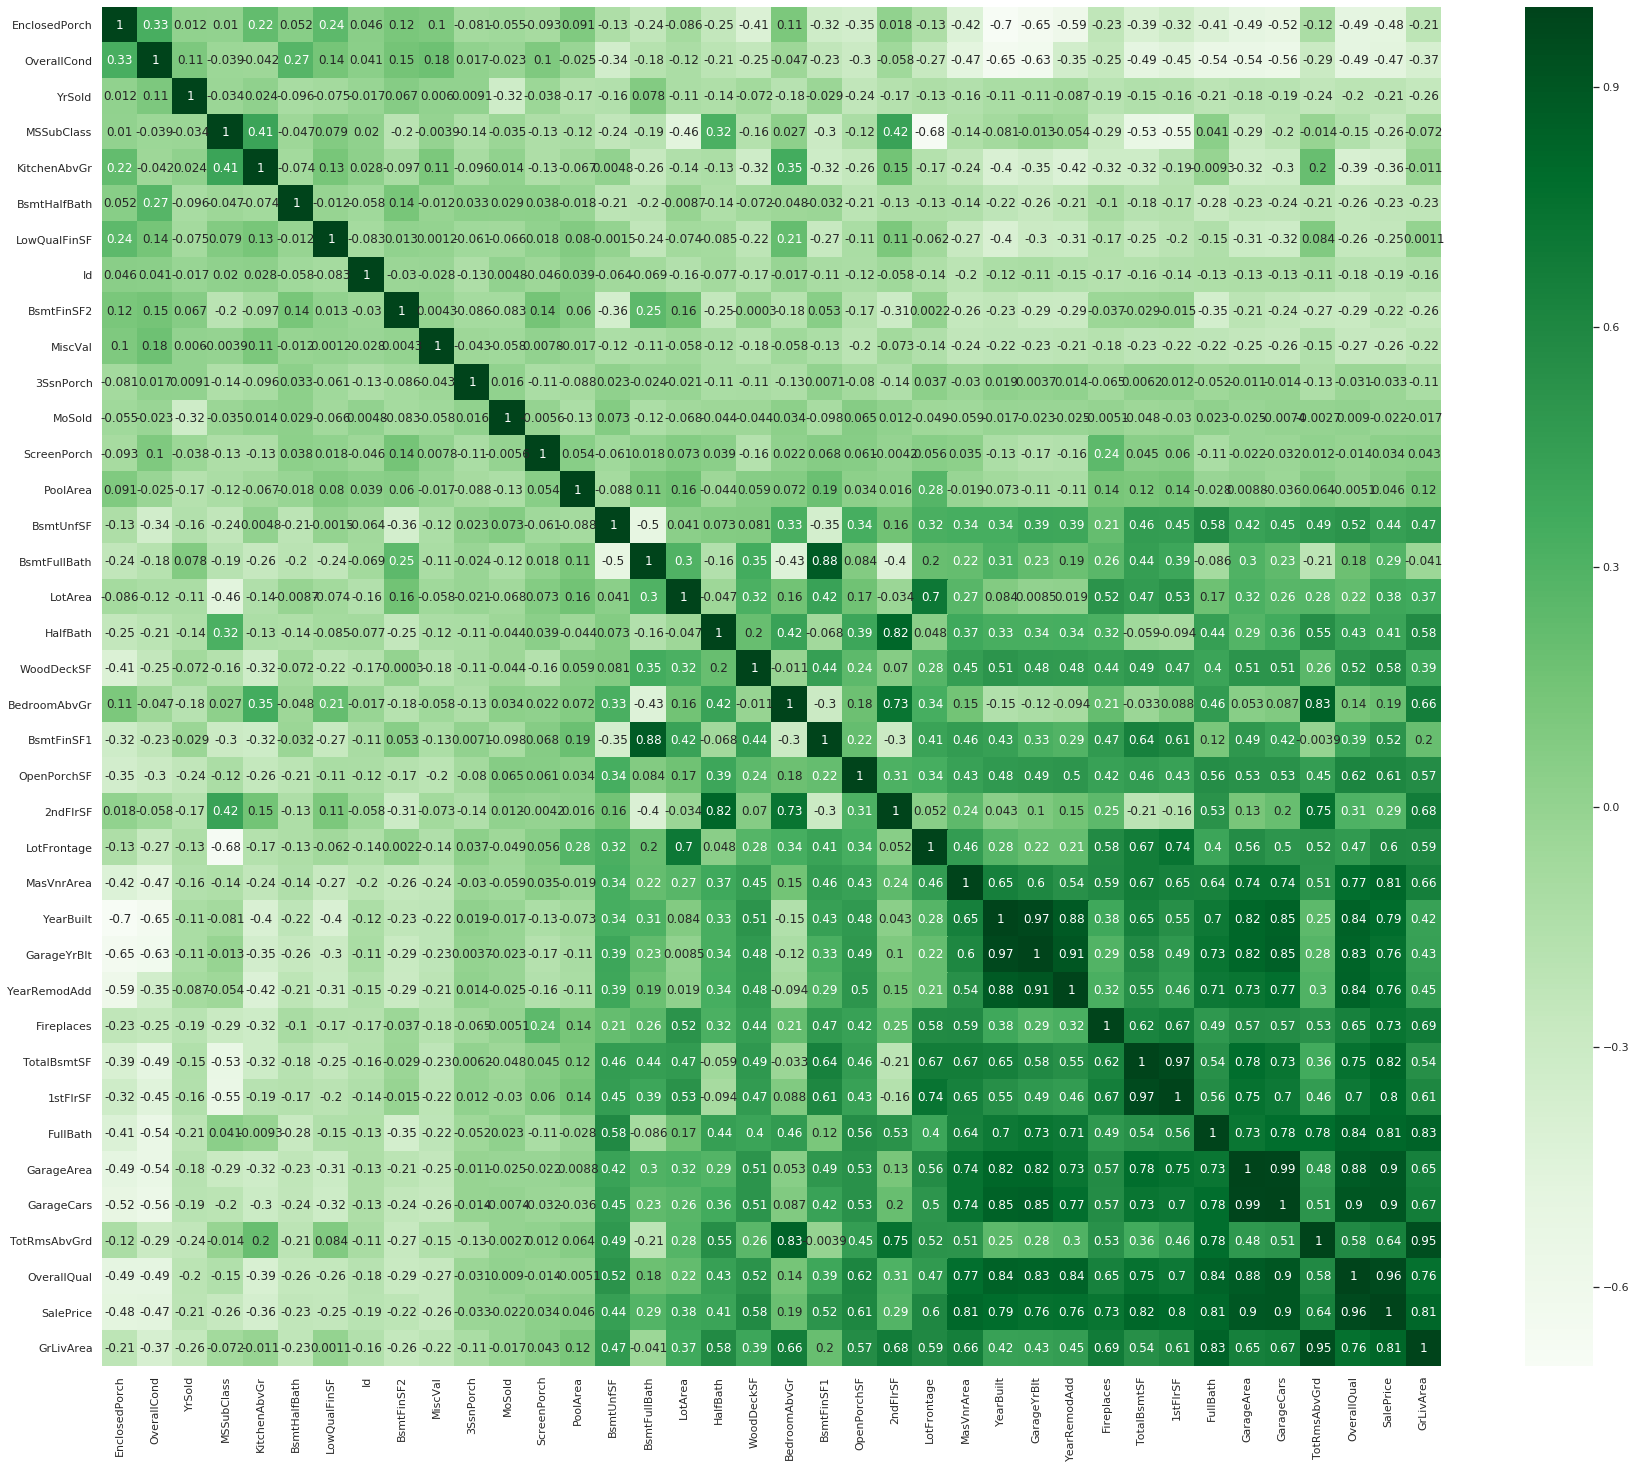

In [16]:
plt.figure(figsize=(30, 25))
plt.autoscale,
sns.heatmap(df_corr_sorted, annot=True, cmap="Greens");
fixheatmap()

(10.0, 0.0)

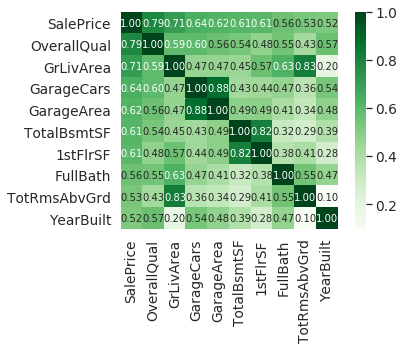

In [17]:
k = 10 #number of variables for heatmap
cols = df_train.corr().nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(df_train[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, 
                 fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, 
                 xticklabels=cols.values, cmap="Greens")
fixheatmap()

In [51]:
PositiveCorr = df_train.corr().nlargest(k, 'SalePrice')['SalePrice'].index

Index(['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea',
       'TotalBsmtSF', '1stFlrSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt'],
      dtype='object')

(10.0, 0.0)

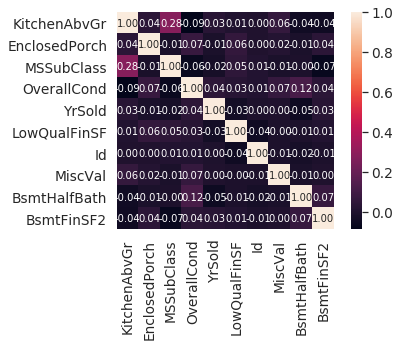

In [18]:
cols = df_train.corr().nsmallest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(df_train[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, 
                 fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, 
                 xticklabels=cols.values)
fixheatmap()

In [39]:
NegativeCorr = cols = df_train.corr().nsmallest(3, 'SalePrice')['SalePrice'].index

### ScatterPlots

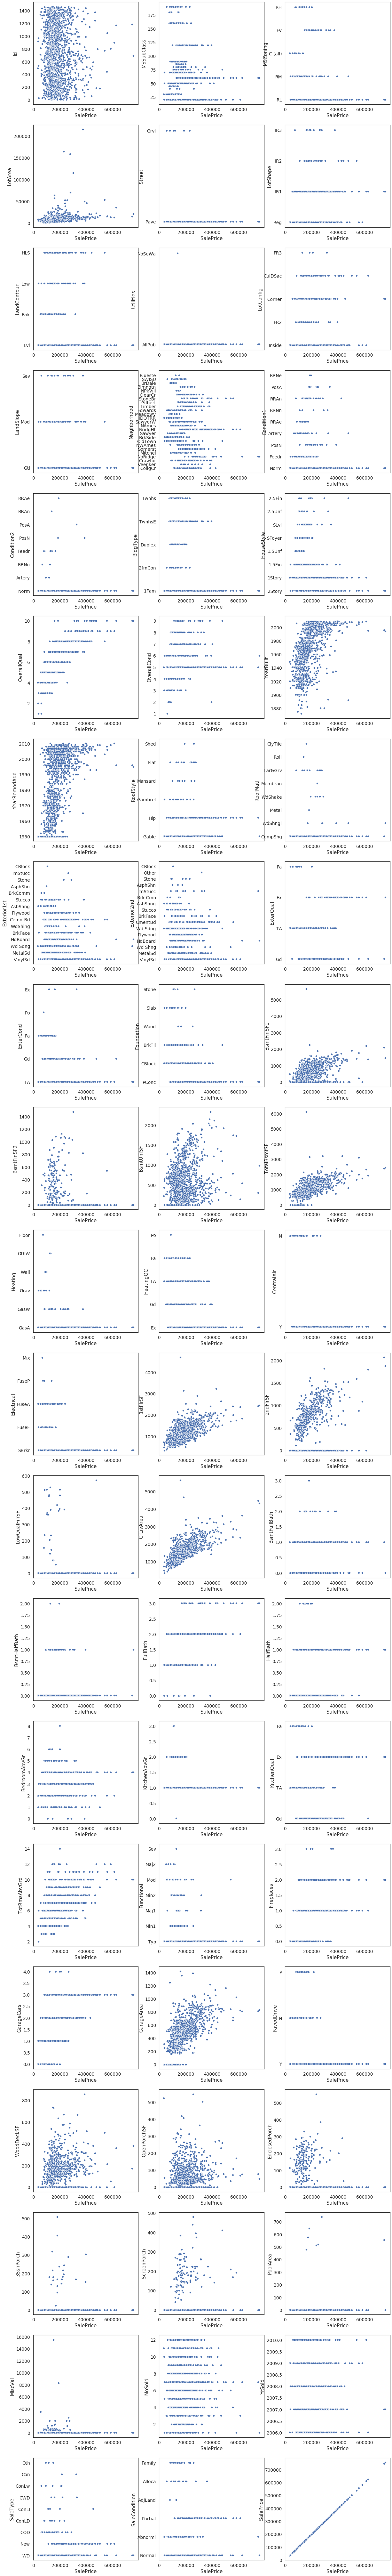

In [42]:
import math
def scatterplots(df, x, ncols):
    size = df.columns.values.size
    variables = df.columns.values
    nrows = math.ceil(size/ncols)
    height = nrows*7
    sns.set_style('white')
    fig, ax = plt.subplots(figsize=(20,height), ncols=ncols, nrows=nrows)
    position = 0
    for line in range(nrows):
        for column in range(ncols):
            sns.scatterplot(x, variables[position], data = df, ax=ax[line][column])
            position += 1
            
scatterplots(df_train, 'SalePrice', 3)

In [5]:
df_train['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

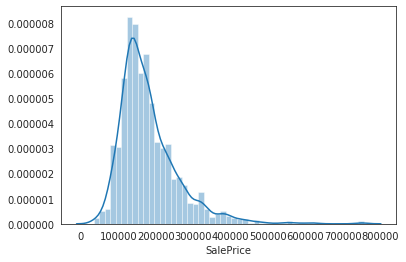

In [6]:
sns.distplot(df_train['SalePrice'])

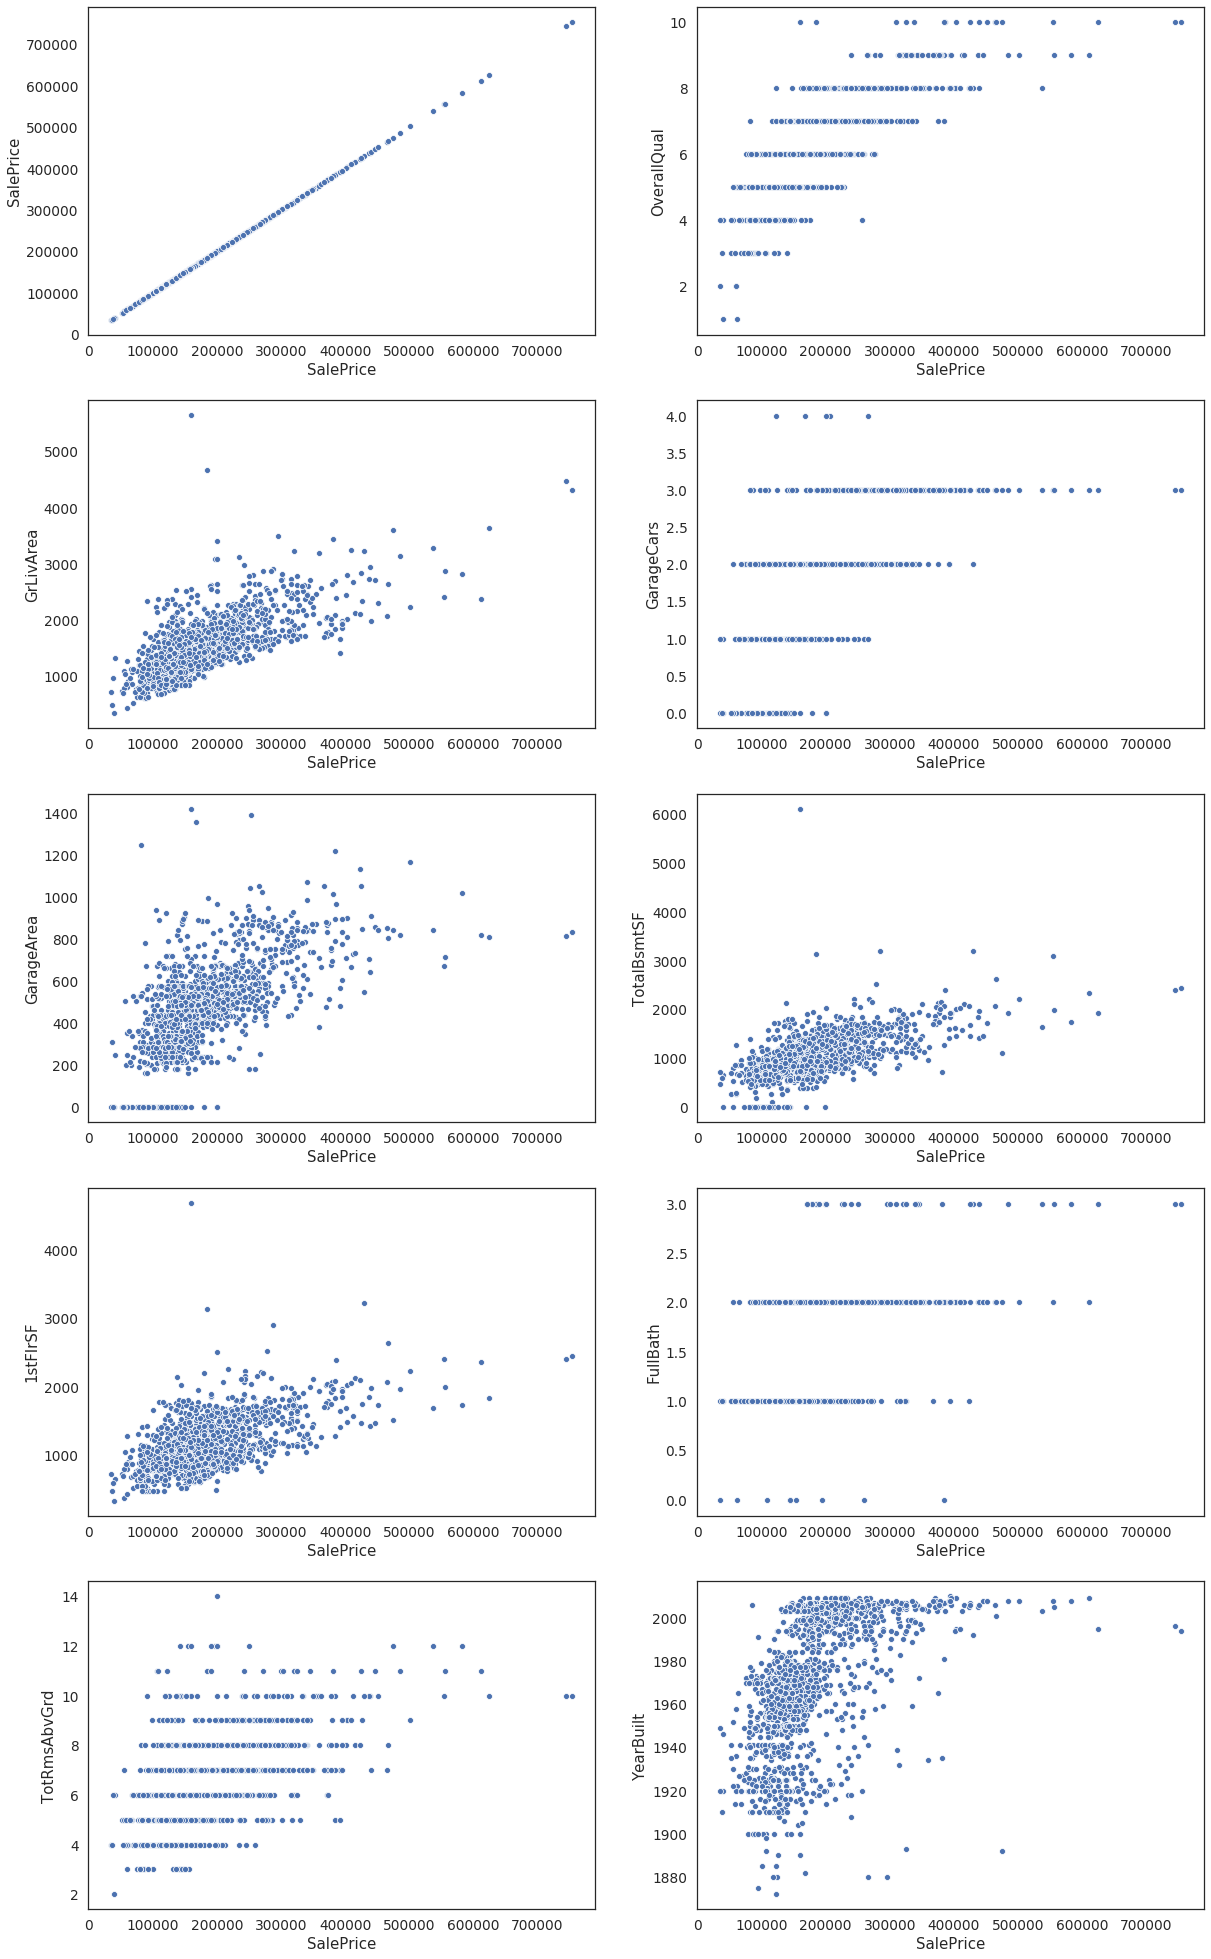

In [53]:
scatterplots(df_train[PositiveCorr], 'SalePrice', 2)

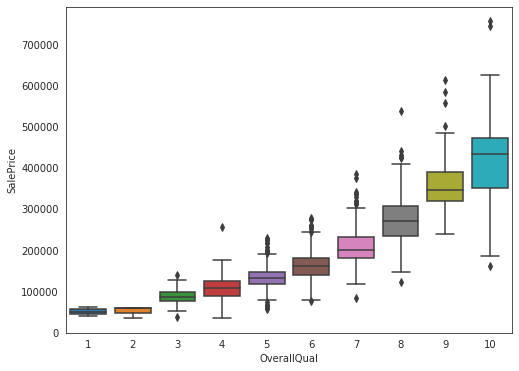

In [11]:
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x='OverallQual', y="SalePrice", data=df_train)

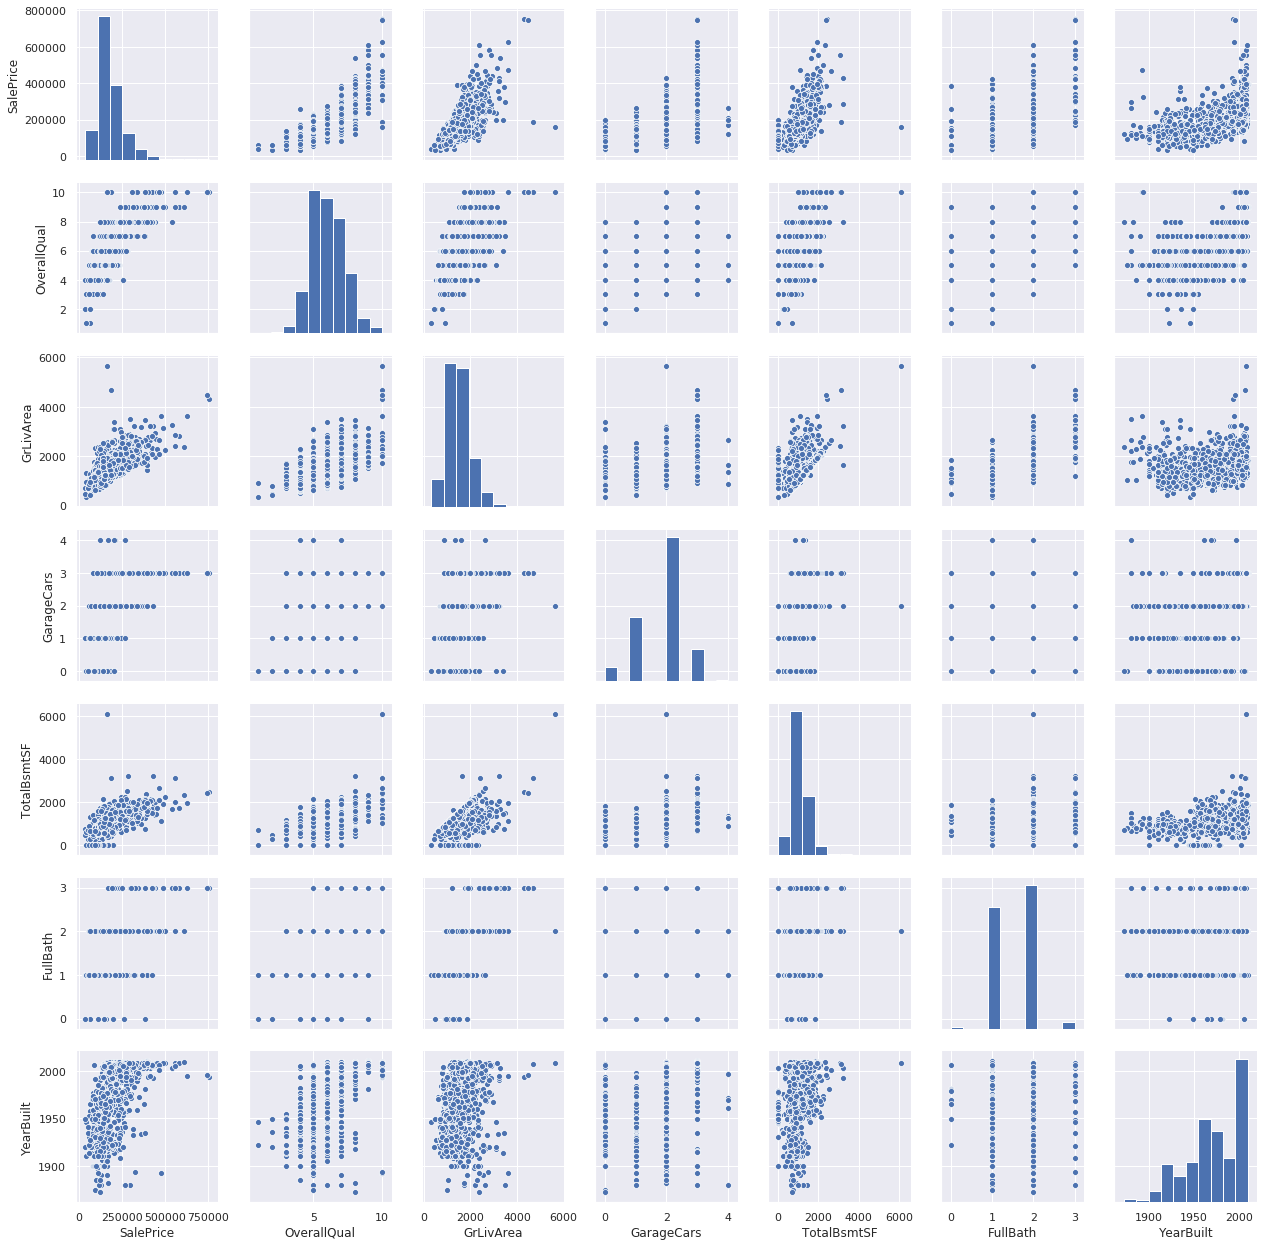

In [12]:
sns.set()
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']
sns.pairplot(df_train[cols], size = 2.5)

### Missing Values

In [19]:
total = df_train.isnull().sum().sort_values(ascending=False)
percent = (df_train.isnull().sum()/df_train.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
FireplaceQu,690,0.472603
LotFrontage,259,0.177397
GarageCond,81,0.055479
GarageType,81,0.055479
GarageYrBlt,81,0.055479
GarageFinish,81,0.055479


In [20]:
df_train = df_train.drop((missing_data[missing_data['Total'] > 1]).index,1)
df_train = df_train.drop(df_train.loc[df_train['Electrical'].isnull()].index)
df_train.isnull().sum().max() #Checking that there is no missing data

0

### Outliers

In [56]:
from sklearn.preprocessing import StandardScaler
saleprice_scaled = StandardScaler().fit_transform(df_train['SalePrice'][:,np.newaxis]);

In [117]:
saleprice_scaled[saleprice_scaled[:,0].argsort()][-10:]

array([[3.82758058],
       [4.0395221 ],
       [4.49473628],
       [4.70872962],
       [4.728631  ],
       [5.06034585],
       [5.42191907],
       [5.58987866],
       [7.10041987],
       [7.22629831]])

In [105]:
print(low_range)

[0 1 2 3 4 5 6 7 8 9]


In [74]:
df_train['SalePrice'][:,np.newaxis]

array([[208500],
       [181500],
       [223500],
       ...,
       [266500],
       [142125],
       [147500]])